In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose



In [2]:
website_df = pd.read_csv('/kaggle/input/website/website_data.csv')
website_df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


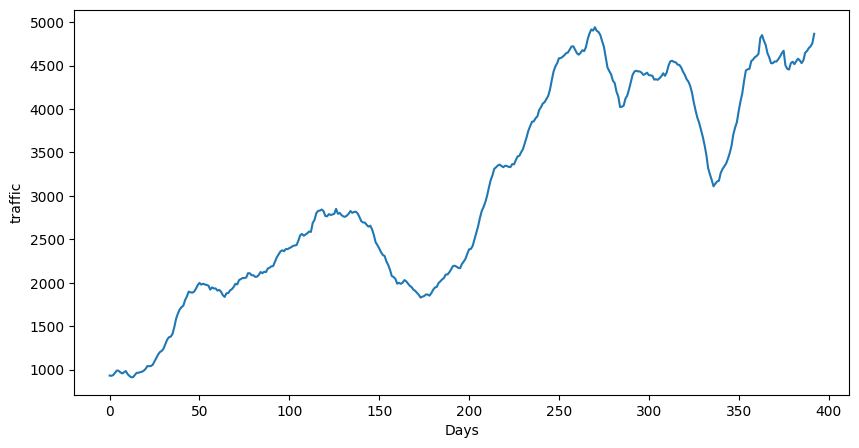

In [3]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(website_df['traffic'])
plt.xlabel('Days')
plt.ylabel('traffic')
plt.show() 

### Train and Test Split

In [4]:
split_index = int(len(website_df)*0.7)
train = website_df[:split_index]
test = website_df[split_index:]

train.shape,test.shape

((275, 1), (118, 1))

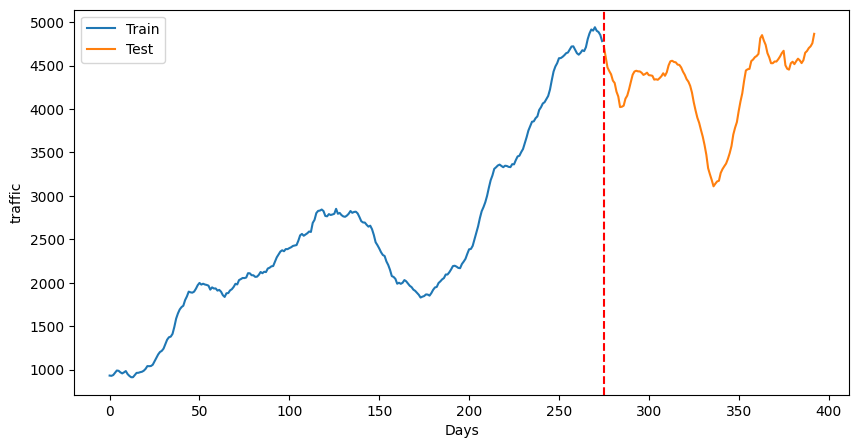

In [5]:
plt.plot(train)
plt.plot(test)
plt.axvline(x= split_index, color ='red',linestyle ='--')
plt.legend(['Train','Test'])
plt.xlabel('Days')
plt.ylabel('traffic')
plt.show()

 ### Check for Stationarity
 
**Method 1**

**Time series plot**: If there is a strong upward and downward trend, the time series is not stationary. In this dataset, the  plot follows a strong upward trend.Hence, the time series is non stationary.

**Method 2**:

**ACF and PACF**

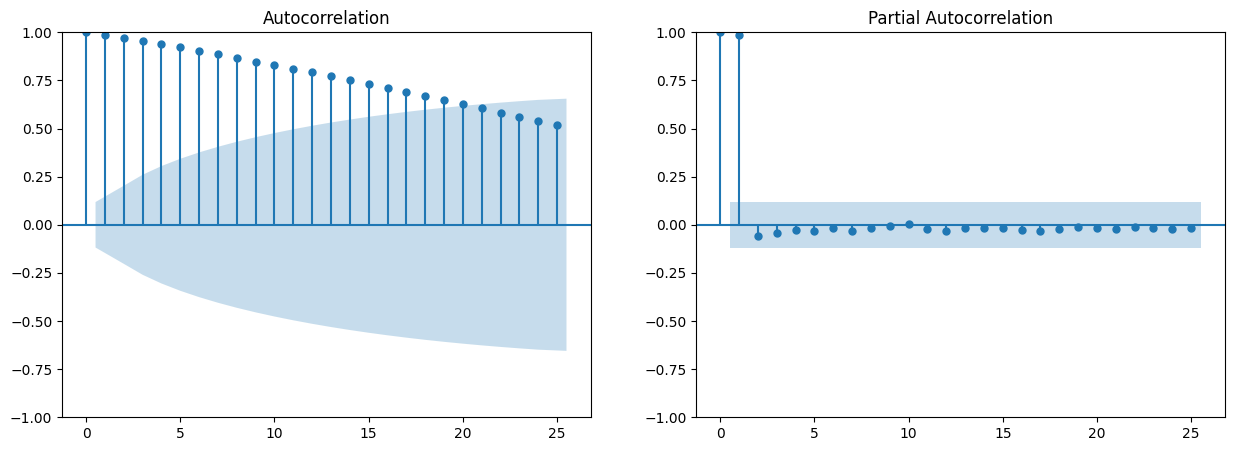

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(train, ax=axs[0]) 
plot_pacf(train , ax=axs[1])
plt.show()

 

### Augmented Decay Fuller Test

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train)
print(f'p-value:{adf_test[1]}')

p-value:0.4637699977261237


### Transform to stationary using differencing

<Axes: >

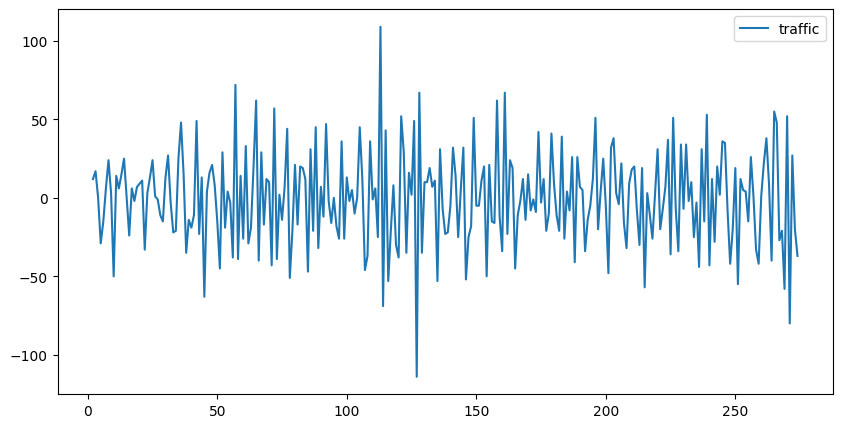

In [8]:
train_diff = (train.diff().dropna()).diff().dropna()
train_diff.plot()

p-value:2.564315928699754e-07


(<Figure size 1000x500 with 1 Axes>, <Figure size 1000x500 with 1 Axes>, None)

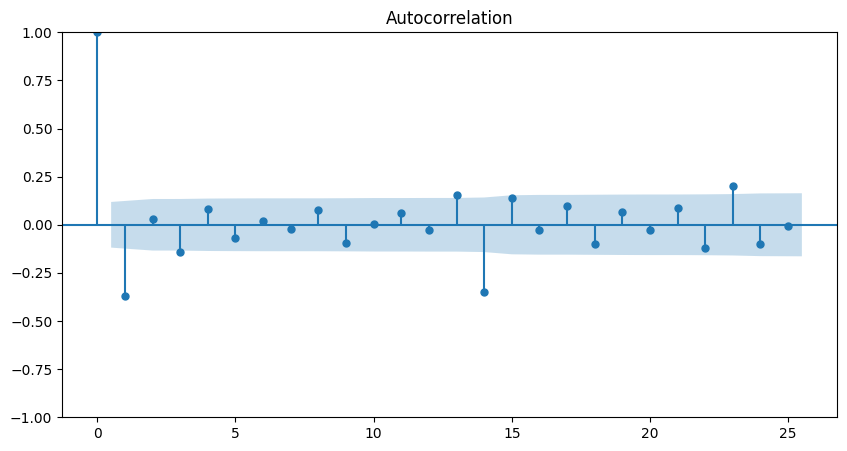

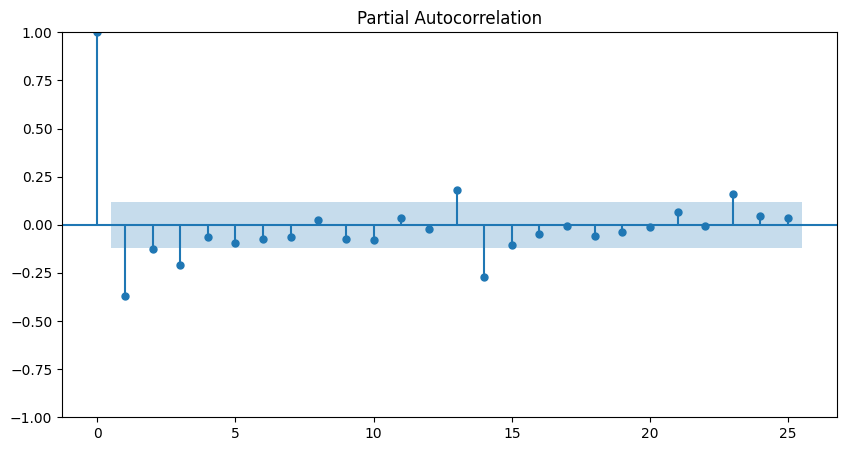

In [9]:
plot_acf(train_diff),plot_pacf(train_diff), print(f'p-value:{adfuller(train_diff)[1]}')

### Fitting the ARIMA Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order = (2,2,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1294.395
Date:                Wed, 13 Mar 2024   AIC                           2594.790
Time:                        15:33:23   BIC                           2605.619
Sample:                             0   HQIC                          2599.137
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4206      0.061     -6.878      0.000      -0.540      -0.301
ar.L2         -0.1296      0.069     -1.866      0.062      -0.266       0.007
sigma2       768.3525     62.237     12.346      0.0

### Make Time Series Predictions

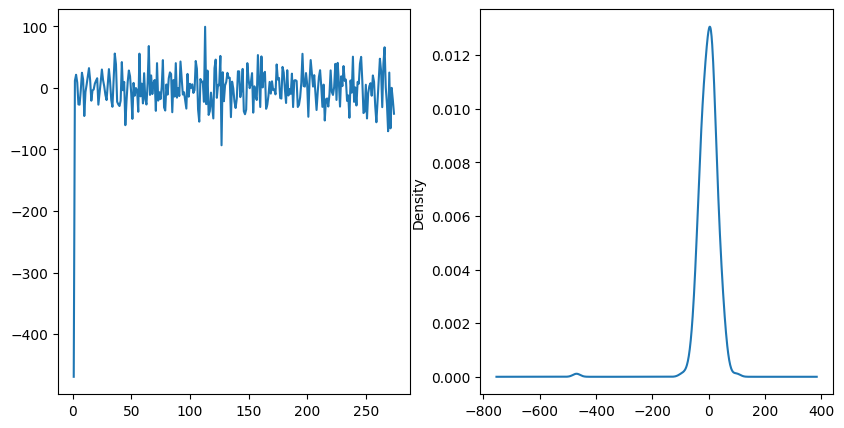

In [11]:
residuals = fitted_model.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot (ax=ax[0])
residuals.plot(kind = 'kde',ax = ax[1])
plt.show()

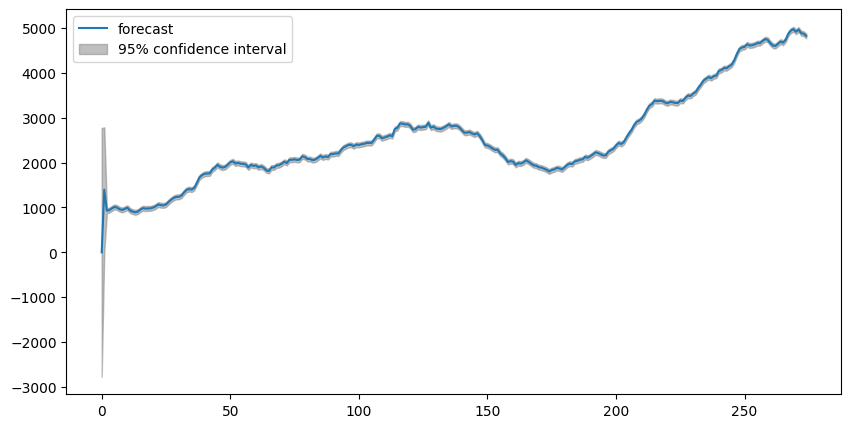

In [12]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(fitted_model,dynamic=False)
plt.show()

In [13]:
# forecast_test = fitted_model.forecast(len(test))
# website_df['forecast'] = [None]*len(train) + list(forecast_test)
# website_df.plot()